# Regression Problem

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#Generate Data
X_train = np.linspace(-1, 1, 20)

y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

X_test = np.linspace(-1, 1, 20)

y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

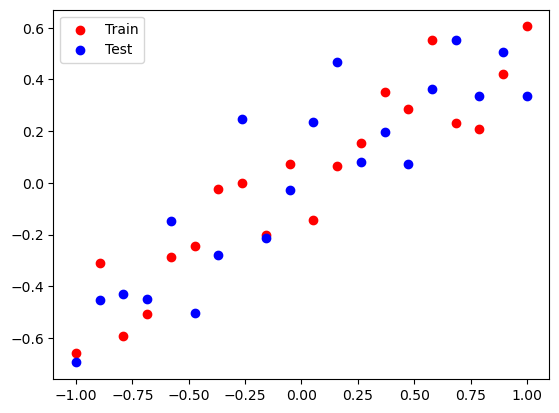

In [4]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [5]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0038786965887993574, Test: 0.04468429833650589


In [7]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


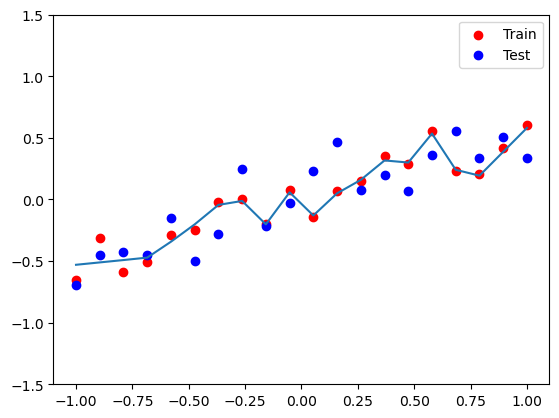

In [8]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [14]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [16]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.017686616629362106, Test: 0.03656301274895668


In [17]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


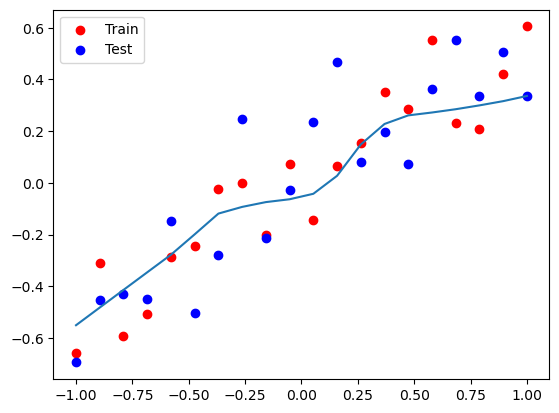

In [19]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
# plt.ylim((-1.5, 1.5))
plt.show()

# Classification Problem

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [22]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

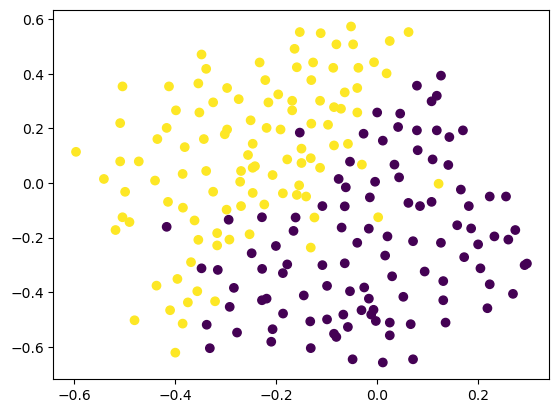

In [23]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500


C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6589 - loss: 0.5943 - val_accuracy: 0.5814 - val_loss: 0.7566
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8734 - loss: 0.2807 - val_accuracy: 0.7209 - val_loss: 0.9462
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8727 - loss: 0.2967 - val_accuracy: 0.8605 - val_loss: 0.5200
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9220 - loss: 0.2719 - val_accuracy: 0.9070 - val_loss: 0.4753
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9068 - loss: 0.2794 - val_accuracy: 0.8605 - val_loss: 0.6001
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9179 - loss: 0.2575 - val_accuracy: 0.7442 - val_loss: 0.7329
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9311 - loss: 0.1908 - val_accuracy: 0.7907 - val_loss: 0.6266
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8945 - loss: 0.2957 - val_accuracy: 0.8605 - val_loss: 0.5147
Epoc

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9325 - loss: 0.1597 - val_accuracy: 0.8605 - val_loss: 0.6590
Epoch 53/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9142 - loss: 0.1706 - val_accuracy: 0.9070 - val_loss: 0.6287
Epoch 54/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9534 - loss: 0.1575 - val_accuracy: 0.8837 - val_loss: 0.7019
Epoch 55/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9603 - loss: 0.1490 - val_accuracy: 0.8605 - val_loss: 0.7431
Epoch 56/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9528 - loss: 0.1345 - val_accuracy: 0.8372 - val_loss: 0.8711
Epoch 57/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9569 - loss: 0.1312 - val_accuracy: 0.8372 - val_loss: 0.9000
Epoch 58/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9497 - loss: 0.1425 - val_accuracy: 0.8372 - val_loss: 1.0544
Epoch 59/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9551 - loss: 0.1429 - val_accuracy: 0.8372 - val_loss: 1.09

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9320 - loss: 0.1689 - val_accuracy: 0.8372 - val_loss: 1.2611
Epoch 104/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9470 - loss: 0.1484 - val_accuracy: 0.8372 - val_loss: 1.1478
Epoch 105/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9655 - loss: 0.1081 - val_accuracy: 0.8605 - val_loss: 1.0078
Epoch 106/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9629 - loss: 0.1082 - val_accuracy: 0.8605 - val_loss: 1.0112
Epoch 107/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9558 - loss: 0.1282 - val_accuracy: 0.8372 - val_loss: 1.0253
Epoch 108/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9268 - loss: 0.1374 - val_accuracy: 0.8837 - val_loss: 0.9965
Epoch 109/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9192 - loss: 0.1401 - val_accuracy: 0.8372 - val_loss: 1.3450
Epoch 110/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9513 - loss: 0.1071 - val_accuracy: 0.8372 - val_loss: 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9775 - loss: 0.0734 - val_accuracy: 0.8372 - val_loss: 1.5710
Epoch 154/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9820 - loss: 0.0706 - val_accuracy: 0.8372 - val_loss: 1.5147
Epoch 155/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9643 - loss: 0.0726 - val_accuracy: 0.8372 - val_loss: 1.5277
Epoch 156/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9621 - loss: 0.0734 - val_accuracy: 0.8372 - val_loss: 1.4809
Epoch 157/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9473 - loss: 0.0862 - val_accuracy: 0.8140 - val_loss: 1.7764
Epoch 158/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9794 - loss: 0.0704 - val_accuracy: 0.8140 - val_loss: 1.5668
Epoch 159/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9697 - loss: 0.0888 - val_accuracy: 0.7907 - val_loss: 1.5190
Epoch 160/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9536 - loss: 0.1028 - val_accuracy: 0.7442 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9688 - loss: 0.0744 - val_accuracy: 0.7907 - val_loss: 1.8364
Epoch 204/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9595 - loss: 0.0697 - val_accuracy: 0.8140 - val_loss: 2.0194
Epoch 205/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9632 - loss: 0.0725 - val_accuracy: 0.8140 - val_loss: 2.2756
Epoch 206/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9731 - loss: 0.0644 - val_accuracy: 0.7907 - val_loss: 2.0320
Epoch 207/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9831 - loss: 0.0620 - val_accuracy: 0.8140 - val_loss: 1.9814
Epoch 208/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9714 - loss: 0.0812 - val_accuracy: 0.8372 - val_loss: 1.6269
Epoch 209/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9664 - loss: 0.0716 - val_accuracy: 0.8140 - val_loss: 2.1066
Epoch 210/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9723 - loss: 0.0862 - val_accuracy: 0.8837 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9710 - loss: 0.0559 - val_accuracy: 0.7907 - val_loss: 2.5126
Epoch 254/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9792 - loss: 0.0423 - val_accuracy: 0.8140 - val_loss: 2.5451
Epoch 255/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9926 - loss: 0.0333 - val_accuracy: 0.8140 - val_loss: 2.7810
Epoch 256/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9837 - loss: 0.0323 - val_accuracy: 0.8140 - val_loss: 2.6721
Epoch 257/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9885 - loss: 0.0367 - val_accuracy: 0.7907 - val_loss: 2.5375
Epoch 258/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0362 - val_accuracy: 0.8140 - val_loss: 2.6862
Epoch 259/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9725 - loss: 0.0505 - val_accuracy: 0.8372 - val_loss: 2.6364
Epoch 260/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9889 - loss: 0.0314 - val_accuracy: 0.7907 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9855 - loss: 0.0343 - val_accuracy: 0.7907 - val_loss: 3.3429
Epoch 304/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9777 - loss: 0.0489 - val_accuracy: 0.8140 - val_loss: 2.8946
Epoch 305/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9777 - loss: 0.0440 - val_accuracy: 0.8140 - val_loss: 3.1544
Epoch 306/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9874 - loss: 0.0351 - val_accuracy: 0.7907 - val_loss: 3.3756
Epoch 307/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9874 - loss: 0.0287 - val_accuracy: 0.8140 - val_loss: 3.0460
Epoch 308/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9896 - loss: 0.0304 - val_accuracy: 0.8140 - val_loss: 3.0502
Epoch 309/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9948 - loss: 0.0320 - val_accuracy: 0.8140 - val_loss: 3.2407
Epoch 310/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9881 - loss: 0.0333 - val_accuracy: 0.8140 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9149 - loss: 0.2607 - val_accuracy: 0.7674 - val_loss: 2.9625
Epoch 354/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9137 - loss: 0.2527 - val_accuracy: 0.7907 - val_loss: 2.2137
Epoch 355/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8837 - loss: 0.2895 - val_accuracy: 0.8837 - val_loss: 1.4697
Epoch 356/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9296 - loss: 0.2269 - val_accuracy: 0.9070 - val_loss: 1.3439
Epoch 357/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9703 - loss: 0.1096 - val_accuracy: 0.8837 - val_loss: 1.7032
Epoch 358/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9305 - loss: 0.1531 - val_accuracy: 0.8372 - val_loss: 2.1778
Epoch 359/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9506 - loss: 0.1019 - val_accuracy: 0.8140 - val_loss: 2.3036
Epoch 360/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9807 - loss: 0.0650 - val_accuracy: 0.8140 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9922 - loss: 0.0301 - val_accuracy: 0.8140 - val_loss: 3.4721
Epoch 404/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9926 - loss: 0.0288 - val_accuracy: 0.8140 - val_loss: 3.5240
Epoch 405/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9974 - loss: 0.0322 - val_accuracy: 0.8372 - val_loss: 3.1391
Epoch 406/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9864 - loss: 0.0392 - val_accuracy: 0.8140 - val_loss: 3.2373
Epoch 407/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0368 - val_accuracy: 0.8140 - val_loss: 3.4719
Epoch 408/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9855 - loss: 0.0415 - val_accuracy: 0.8837 - val_loss: 2.6861
Epoch 409/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9807 - loss: 0.0410 - val_accuracy: 0.8140 - val_loss: 3.1892
Epoch 410/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.7907 - val_loss: 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9963 - loss: 0.0176 - val_accuracy: 0.8140 - val_loss: 3.7092
Epoch 454/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9948 - loss: 0.0150 - val_accuracy: 0.8140 - val_loss: 3.6875
Epoch 455/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9948 - loss: 0.0143 - val_accuracy: 0.8140 - val_loss: 3.6637
Epoch 456/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9881 - loss: 0.0198 - val_accuracy: 0.8140 - val_loss: 3.6725
Epoch 457/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9881 - loss: 0.0234 - val_accuracy: 0.8140 - val_loss: 3.6929
Epoch 458/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.8140 - val_loss: 3.7392
Epoch 459/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9963 - loss: 0.0136 - val_accuracy: 0.8140 - val_loss: 3.7317
Epoch 460/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9881 - loss: 0.0208 - val_accuracy: 0.8140 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


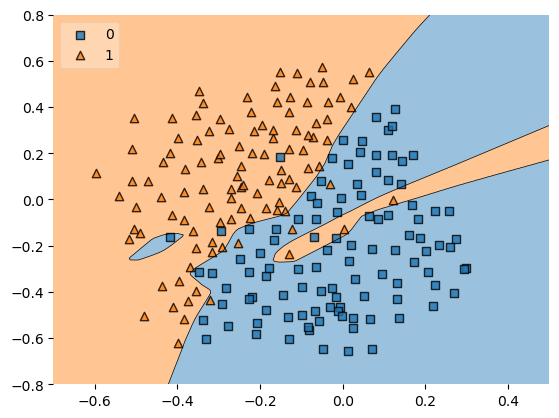

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

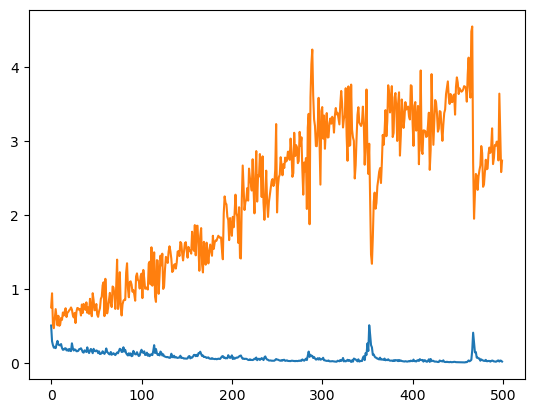

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

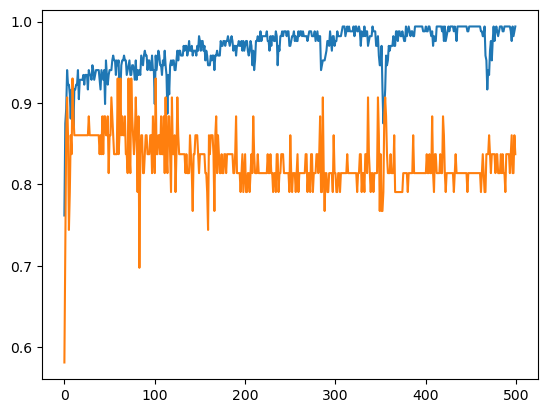

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6846 - loss: 0.6229 - val_accuracy: 0.5814 - val_loss: 0.6734
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8778 - loss: 0.3301 - val_accuracy: 0.7209 - val_loss: 0.8568
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8994 - loss: 0.2516 - val_accuracy: 0.8140 - val_loss: 0.7053
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9307 - loss: 0.2501 - val_accuracy: 0.8605 - val_loss: 0.6126
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8875 - loss: 0.2445 - val_accuracy: 0.8837 - val_loss: 0.5041
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9161 - loss: 0.2374 - val_accuracy: 0.8605 - val_loss: 0.5914
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9459 - loss: 0.2103 - val_accuracy: 0.8372 - val_loss: 0.6789
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8882 - loss: 0.2808 - val_accuracy: 0.7907 - val_loss:

Epoch 52/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9350 - loss: 0.2249 - val_accuracy: 0.8605 - val_loss: 0.6862
Epoch 53/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8875 - loss: 0.2310 - val_accuracy: 0.8605 - val_loss: 0.7074
Epoch 54/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9372 - loss: 0.1812 - val_accuracy: 0.8605 - val_loss: 0.6534
Epoch 55/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9328 - loss: 0.1853 - val_accuracy: 0.8605 - val_loss: 0.6400
Epoch 56/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9281 - loss: 0.1982 - val_accuracy: 0.8605 - val_loss: 0.5933
Epoch 57/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9065 - loss: 0.1877 - val_accuracy: 0.8605 - val_loss: 0.6799
Epoch 58/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9523 - loss: 0.1487 - val_accuracy: 0.8605 - val_loss: 0.7470
Epoch 59/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9376 - loss: 0.1652 - val_accuracy: 0.8605 - v

Epoch 103/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9212 - loss: 0.1804 - val_accuracy: 0.8605 - val_loss: 0.7635
Epoch 104/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9129 - loss: 0.2117 - val_accuracy: 0.8605 - val_loss: 0.7714
Epoch 105/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9451 - loss: 0.1681 - val_accuracy: 0.8605 - val_loss: 0.8203
Epoch 106/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9305 - loss: 0.2042 - val_accuracy: 0.8605 - val_loss: 0.8256
Epoch 107/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9172 - loss: 0.1697 - val_accuracy: 0.8605 - val_loss: 0.8420
Epoch 108/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9283 - loss: 0.1764 - val_accuracy: 0.8605 - val_loss: 0.8874
Epoch 109/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9408 - loss: 0.1648 - val_accuracy: 0.8605 - val_loss: 0.9232
Epoch 110/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9084 - loss: 0.2232 - val_accuracy: 0.8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9004 - loss: 0.2170 - val_accuracy: 0.8605 - val_loss: 0.8227
Epoch 154/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9385 - loss: 0.1944 - val_accuracy: 0.8605 - val_loss: 0.7299
Epoch 155/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9142 - loss: 0.1924 - val_accuracy: 0.8837 - val_loss: 0.6412
Epoch 156/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9555 - loss: 0.1833 - val_accuracy: 0.8605 - val_loss: 0.7205
Epoch 157/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9434 - loss: 0.1767 - val_accuracy: 0.8837 - val_loss: 0.7112
Epoch 158/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9443 - loss: 0.1571 - val_accuracy: 0.8837 - val_loss: 0.6901
Epoch 159/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9205 - loss: 0.1911 - val_accuracy: 0.9070 - val_loss: 0.5958
Epoch 160/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9212 - loss: 0.1809 - val_accuracy: 0.9070 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9101 - loss: 0.1890 - val_accuracy: 0.8605 - val_loss: 0.9984
Epoch 204/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9212 - loss: 0.1659 - val_accuracy: 0.8605 - val_loss: 1.1444
Epoch 205/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9091 - loss: 0.2324 - val_accuracy: 0.8605 - val_loss: 1.1262
Epoch 206/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9320 - loss: 0.1376 - val_accuracy: 0.8605 - val_loss: 1.0213
Epoch 207/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9005 - loss: 0.1862 - val_accuracy: 0.8605 - val_loss: 1.0488
Epoch 208/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9109 - loss: 0.1901 - val_accuracy: 0.8605 - val_loss: 1.0021
Epoch 209/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9287 - loss: 0.1757 - val_accuracy: 0.8605 - val_loss: 0.9352
Epoch 210/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9251 - loss: 0.1582 - val_accuracy: 0.8605 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9086 - loss: 0.2211 - val_accuracy: 0.8605 - val_loss: 1.4182
Epoch 254/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8785 - loss: 0.2371 - val_accuracy: 0.8605 - val_loss: 1.2206
Epoch 255/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9191 - loss: 0.1637 - val_accuracy: 0.8605 - val_loss: 1.0681
Epoch 256/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9248 - loss: 0.1630 - val_accuracy: 0.8605 - val_loss: 1.1197
Epoch 257/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9290 - loss: 0.1914 - val_accuracy: 0.8605 - val_loss: 1.2670
Epoch 258/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9224 - loss: 0.1721 - val_accuracy: 0.8605 - val_loss: 1.2392
Epoch 259/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9287 - loss: 0.1657 - val_accuracy: 0.8605 - val_loss: 1.2096
Epoch 260/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9276 - loss: 0.1590 - val_accuracy: 0.8605 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9435 - loss: 0.1921 - val_accuracy: 0.8605 - val_loss: 1.6178
Epoch 304/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9504 - loss: 0.1527 - val_accuracy: 0.8372 - val_loss: 1.7148
Epoch 305/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9013 - loss: 0.1710 - val_accuracy: 0.8372 - val_loss: 1.5717
Epoch 306/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9216 - loss: 0.1371 - val_accuracy: 0.8372 - val_loss: 1.4109
Epoch 307/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9515 - loss: 0.1407 - val_accuracy: 0.8605 - val_loss: 1.2734
Epoch 308/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9309 - loss: 0.1521 - val_accuracy: 0.8605 - val_loss: 1.1850
Epoch 309/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9311 - loss: 0.1709 - val_accuracy: 0.8605 - val_loss: 1.3139
Epoch 310/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9328 - loss: 0.1574 - val_accuracy: 0.8605 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9498 - loss: 0.1486 - val_accuracy: 0.8837 - val_loss: 1.2401
Epoch 354/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9149 - loss: 0.1673 - val_accuracy: 0.9070 - val_loss: 1.2088
Epoch 355/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9287 - loss: 0.1633 - val_accuracy: 0.8605 - val_loss: 1.3670
Epoch 356/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9324 - loss: 0.1758 - val_accuracy: 0.8372 - val_loss: 1.5464
Epoch 357/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9194 - loss: 0.1719 - val_accuracy: 0.8372 - val_loss: 1.7557
Epoch 358/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9532 - loss: 0.1117 - val_accuracy: 0.8605 - val_loss: 1.8037
Epoch 359/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9428 - loss: 0.2025 - val_accuracy: 0.8372 - val_loss: 1.7558
Epoch 360/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9350 - loss: 0.1415 - val_accuracy: 0.8837 - val_loss: 1.

Epoch 404/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9402 - loss: 0.1608 - val_accuracy: 0.8837 - val_loss: 1.3570
Epoch 405/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9551 - loss: 0.1308 - val_accuracy: 0.8605 - val_loss: 1.4862
Epoch 406/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9488 - loss: 0.1212 - val_accuracy: 0.8605 - val_loss: 1.6544
Epoch 407/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9547 - loss: 0.1181 - val_accuracy: 0.8372 - val_loss: 1.8579
Epoch 408/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9285 - loss: 0.1324 - val_accuracy: 0.8372 - val_loss: 1.9333
Epoch 409/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9257 - loss: 0.1746 - val_accuracy: 0.8605 - val_loss: 1.9346
Epoch 410/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9268 - loss: 0.1461 - val_accuracy: 0.8605 - val_loss: 1.5996
Epoch 411/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9317 - loss: 0.1474 - val_accuracy: 0.8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9422 - loss: 0.1601 - val_accuracy: 0.8837 - val_loss: 1.6874
Epoch 455/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9344 - loss: 0.1371 - val_accuracy: 0.8837 - val_loss: 1.5746
Epoch 456/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9742 - loss: 0.1054 - val_accuracy: 0.8605 - val_loss: 1.5740
Epoch 457/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9458 - loss: 0.1230 - val_accuracy: 0.8605 - val_loss: 1.7501
Epoch 458/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9419 - loss: 0.1325 - val_accuracy: 0.8605 - val_loss: 2.2171
Epoch 459/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9172 - loss: 0.1848 - val_accuracy: 0.8605 - val_loss: 2.4674
Epoch 460/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9372 - loss: 0.1567 - val_accuracy: 0.8605 - val_loss: 1.7842
Epoch 461/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9511 - loss: 0.1186 - val_accuracy: 0.8837 - val_loss: 1.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 919us/step


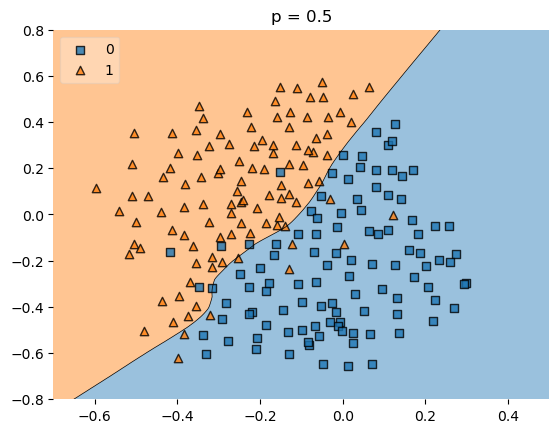

In [30]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

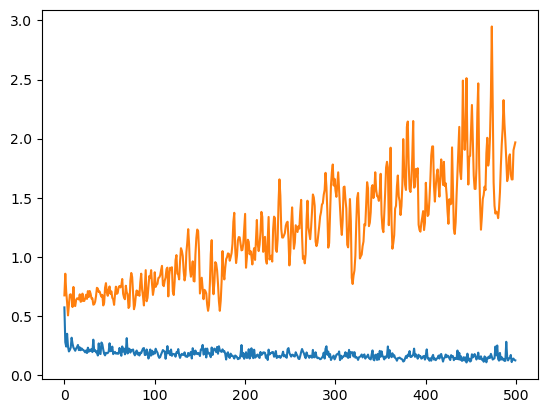

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

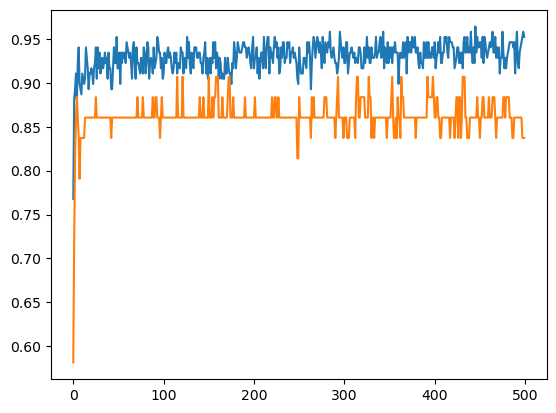

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])